In [9]:
import math
import numpy as np
import pandas as pd
from collections import Counter

In [10]:
data = {
    "Outlook":["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast","Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp":[85,80,83,70,68,65,64,72,69,75,75,72,81,71],
    "Humidity":[85,90,78,96,80,70,65,95,70,80,70,90,75,80],
    "Wind":["Weak","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "Decision":["No","No","Yes","Yes","Yes","No","Yes","No","Yes","Yes","Yes","Yes","Yes","No"]
}

df = pd.DataFrame(data)
print(df)

     Outlook  Temp  Humidity    Wind Decision
0      Sunny    85        85    Weak       No
1      Sunny    80        90  Strong       No
2   Overcast    83        78    Weak      Yes
3       Rain    70        96    Weak      Yes
4       Rain    68        80    Weak      Yes
5       Rain    65        70  Strong       No
6   Overcast    64        65  Strong      Yes
7      Sunny    72        95    Weak       No
8      Sunny    69        70    Weak      Yes
9       Rain    75        80    Weak      Yes
10     Sunny    75        70  Strong      Yes
11  Overcast    72        90  Strong      Yes
12  Overcast    81        75    Weak      Yes
13      Rain    71        80  Strong       No


### Q-1

In [16]:
import math
from collections import Counter

def entropy(data):
    total_count = len(data)
    label_counts = Counter(row[-1] for row in data)
    return -sum((count / total_count) * math.log2(count / total_count) for count in label_counts.values())

def information_gain(data, feature_index):
    total_entropy = entropy(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_entropy = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    return total_entropy - weighted_entropy

def c45(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [information_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = c45(subset, remaining_features)

    return tree
# def build_tree(data, features):
#     labels = [row[-1] for row in data]
#     if len(set(labels)) == 1:
#         return labels[0]  # Return single class label as leaf node
#     if not features:
#         return Counter(labels).most_common(1)[0][0]  # Return majority class as leaf node

#     # Find best feature to split on
#     gains = [(information_gain(data, f), f) for f in features]
#     best_gain, best_feature = max(gains, key=lambda x: x[0])
#     if best_gain == 0:
#         return Counter(labels).most_common(1)[0][0]  # Return majority class if no gain

#     # Build tree for best feature with values mapped directly to class labels
#     tree = {}
#     feature_values = set(row[best_feature] for row in data)
#     for value in feature_values:
#         subset = [row for row in data if row[best_feature] == value]
#         remaining_features = [f for f in features if f != best_feature]
#         tree[value] = build_tree(subset, remaining_features)
#     return {best_feature: tree}

### classification of new sample done in additional questions

### Q-2

In [17]:
# Calculate Gini impurity
def gini_impurity(data):
    total_count = len(data)
    if total_count == 0:
        return 0
    label_counts = Counter(row[-1] for row in data)
    return 1 - sum((count / total_count) ** 2 for count in label_counts.values())

# Calculate Gini Index
def gini_index(data, feature_index):
    total_gini = gini_impurity(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_gini = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_gini += (len(subset) / len(data)) * gini_impurity(subset)

    return total_gini - weighted_gini

# CART Decision Tree Implementation
def cart(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [gini_index(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = cart(subset, remaining_features)

    return tree

### Results

#### Method-1

In [18]:
# Main execution
data_list = df.values.tolist()  # Convert DataFrame to list of lists
features = list(range(len(df.columns) - 1))  # Use indices for features (0, 1, 2, 3)

# Build C4.5 and CART trees
c45_tree = c45(data_list, features)
cart_tree = cart(data_list, features)


# Display the trees
print("C4.5 Decision Tree:")
print(c45_tree)

print("\nCART Decision Tree:")
print(cart_tree)


C4.5 Decision Tree:
{1: {64: 'Yes', 65: 'No', 68: 'Yes', 69: 'Yes', 70: 'Yes', 71: 'No', 72: {0: {'Overcast': 'Yes', 'Sunny': 'No'}}, 75: 'Yes', 80: 'No', 81: 'Yes', 83: 'Yes', 85: 'No'}}

CART Decision Tree:
{1: {64: 'Yes', 65: 'No', 68: 'Yes', 69: 'Yes', 70: 'Yes', 71: 'No', 72: {0: {'Overcast': 'Yes', 'Sunny': 'No'}}, 75: 'Yes', 80: 'No', 81: 'Yes', 83: 'Yes', 85: 'No'}}


#### Method-2

In [19]:
# Function to print the decision tree with nodes and branches
def print_tree(tree, level=0):
    if isinstance(tree, dict):
        for feature, branches in tree.items():
            for branch, subtree in branches.items():
                # Display the node and branch with indentation and arrow symbols
                print("    " * level + f"├── {feature} = {branch}")
                print_tree(subtree, level + 1)
    else:
        # Leaf node, print the prediction
        print("    " * level + f"└── Predict: {tree}")


# Print C4.5 DecisionTree with nodes and branches
print("\nC4.5 Decision Tree:")
print_tree(c45_tree)

# Print CART Decision Tree with nodes and branches
print("\nCART Decision Tree:")
print_tree(cart_tree)


C4.5 Decision Tree:
├── 1 = 64
    └── Predict: Yes
├── 1 = 65
    └── Predict: No
├── 1 = 68
    └── Predict: Yes
├── 1 = 69
    └── Predict: Yes
├── 1 = 70
    └── Predict: Yes
├── 1 = 71
    └── Predict: No
├── 1 = 72
    ├── 0 = Overcast
        └── Predict: Yes
    ├── 0 = Sunny
        └── Predict: No
├── 1 = 75
    └── Predict: Yes
├── 1 = 80
    └── Predict: No
├── 1 = 81
    └── Predict: Yes
├── 1 = 83
    └── Predict: Yes
├── 1 = 85
    └── Predict: No

CART Decision Tree:
├── 1 = 64
    └── Predict: Yes
├── 1 = 65
    └── Predict: No
├── 1 = 68
    └── Predict: Yes
├── 1 = 69
    └── Predict: Yes
├── 1 = 70
    └── Predict: Yes
├── 1 = 71
    └── Predict: No
├── 1 = 72
    ├── 0 = Overcast
        └── Predict: Yes
    ├── 0 = Sunny
        └── Predict: No
├── 1 = 75
    └── Predict: Yes
├── 1 = 80
    └── Predict: No
├── 1 = 81
    └── Predict: Yes
├── 1 = 83
    └── Predict: Yes
├── 1 = 85
    └── Predict: No


#### Method-3

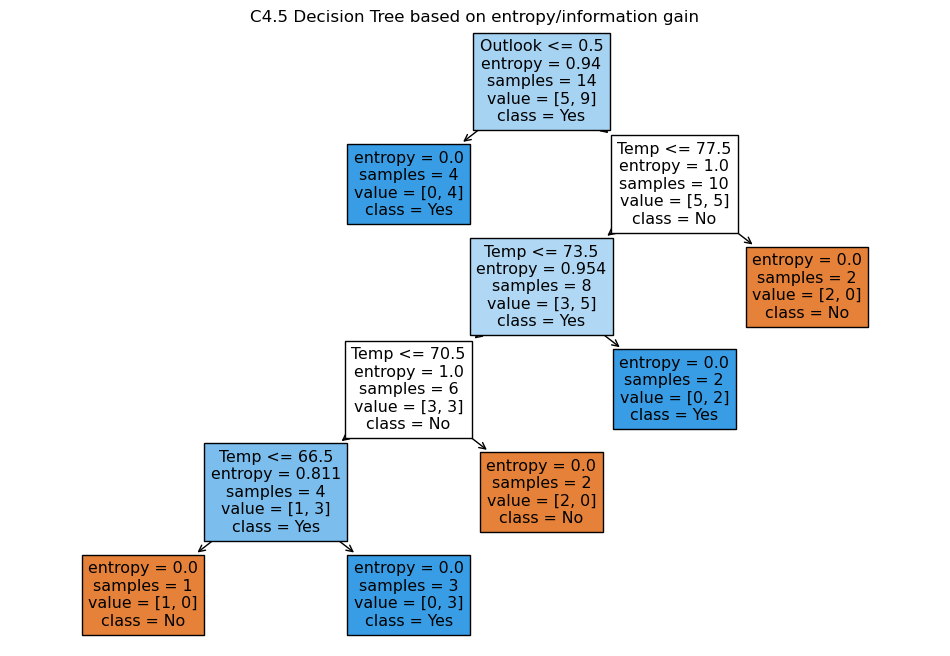

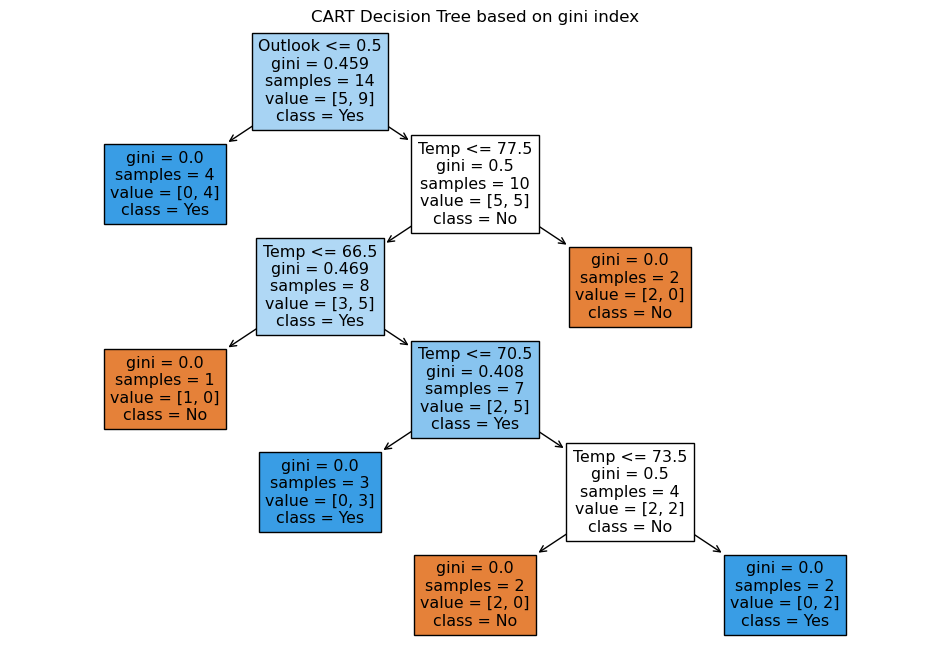

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()

df['Outlook'] = le.fit_transform(df['Outlook'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Decision'] = le.fit_transform(df['Decision'])

# Split features (X) and target (y)
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]  # Feature columns
y = df['Decision']  # Target column

# Train the Decision Tree Classifier using the entropy criterion
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("C4.5 Decision Tree based on entropy/information gain")
plt.show()

# Train the Decision Tree Classifier using the gini criterion
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("CART Decision Tree based on gini index")
plt.show()


### Q-3

In [27]:
import pandas as pd

# Create the dataset
data = {
    "Income": ["Low", "Low", "Medium", "Medium", "High", "High"],
    "Credit": ["Good", "Bad", "Good", "Bad", "Good", "Bad"],
    "Loan Approved": ["Yes", "No", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)
print(df)


   Income Credit Loan Approved
0     Low   Good           Yes
1     Low    Bad            No
2  Medium   Good           Yes
3  Medium    Bad           Yes
4    High   Good           Yes
5    High    Bad            No


#### Function for C4.5

In [28]:
import math
from collections import Counter

def entropy(data):
    total_count = len(data)
    label_counts = Counter(row[-1] for row in data)
    return -sum((count / total_count) * math.log2(count / total_count) for count in label_counts.values())

def information_gain(data, feature_index):
    total_entropy = entropy(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_entropy = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    return total_entropy - weighted_entropy

def c45(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [information_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = c45(subset, remaining_features)

    return tree

#### Function for CART

In [29]:
def gini_impurity(data):
    total_count = len(data)
    if total_count == 0:
        return 0
    label_counts = Counter(row[-1] for row in data)
    return 1 - sum((count / total_count) ** 2 for count in label_counts.values())

def gini_gain(data, feature_index):
    total_gini = gini_impurity(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_gini = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_gini += (len(subset) / len(data)) * gini_impurity(subset)

    return total_gini - weighted_gini

def cart(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [gini_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = cart(subset, remaining_features)

    return tree

#### Predictions

In [30]:
# Prepare the data
data_list = df.values.tolist()
features = list(range(len(df.columns) - 1))  # Indices of features

# Build C4.5 and CART trees
c45_tree = c45(data_list, features)
cart_tree = cart(data_list, features)

# Function to print the decision tree
def print_tree(tree, level=0):
    if isinstance(tree, dict):
        for feature, branches in tree.items():
            for branch, subtree in branches.items():
                print("    " * level + f"{feature} = {branch}:")
                print_tree(subtree, level + 1)
    else:
        print("    " * level + f"Predict: {tree}")

# Print C4.5 Decision Tree
print("\nC4.5 Decision Tree:")
print_tree(c45_tree)

# Print CART Decision Tree
print("\nCART Decision Tree:")
print_tree(cart_tree)


C4.5 Decision Tree:
1 = Good:
    Predict: Yes
1 = Bad:
    0 = Low:
        Predict: No
    0 = High:
        Predict: No
    0 = Medium:
        Predict: Yes

CART Decision Tree:
1 = Good:
    Predict: Yes
1 = Bad:
    0 = Low:
        Predict: No
    0 = High:
        Predict: No
    0 = Medium:
        Predict: Yes


In [31]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Prepare features and target variable
X = df[["Income", "Credit"]]
y = df["Loan Approved"]

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

# Create and fit the C4.5 decision tree
clf_c45 = DecisionTreeClassifier(criterion='entropy')
clf_c45.fit(X, y)

# Create and fit the CART decision tree
clf_cart = DecisionTreeClassifier(criterion='gini')
clf_cart.fit(X, y)

# Print the tree structure
print("\nC4.5 Decision Tree (Scikit-Learn):")
print(export_text(clf_c45, feature_names=list(X.columns)))

print("\nCART Decision Tree (Scikit-Learn):")
print(export_text(clf_cart, feature_names=list(X.columns)))



C4.5 Decision Tree (Scikit-Learn):
|--- Credit_Good <= 0.50
|   |--- Income_Medium <= 0.50
|   |   |--- class: No
|   |--- Income_Medium >  0.50
|   |   |--- class: Yes
|--- Credit_Good >  0.50
|   |--- class: Yes


CART Decision Tree (Scikit-Learn):
|--- Credit_Good <= 0.50
|   |--- Income_Medium <= 0.50
|   |   |--- class: No
|   |--- Income_Medium >  0.50
|   |   |--- class: Yes
|--- Credit_Good >  0.50
|   |--- class: Yes



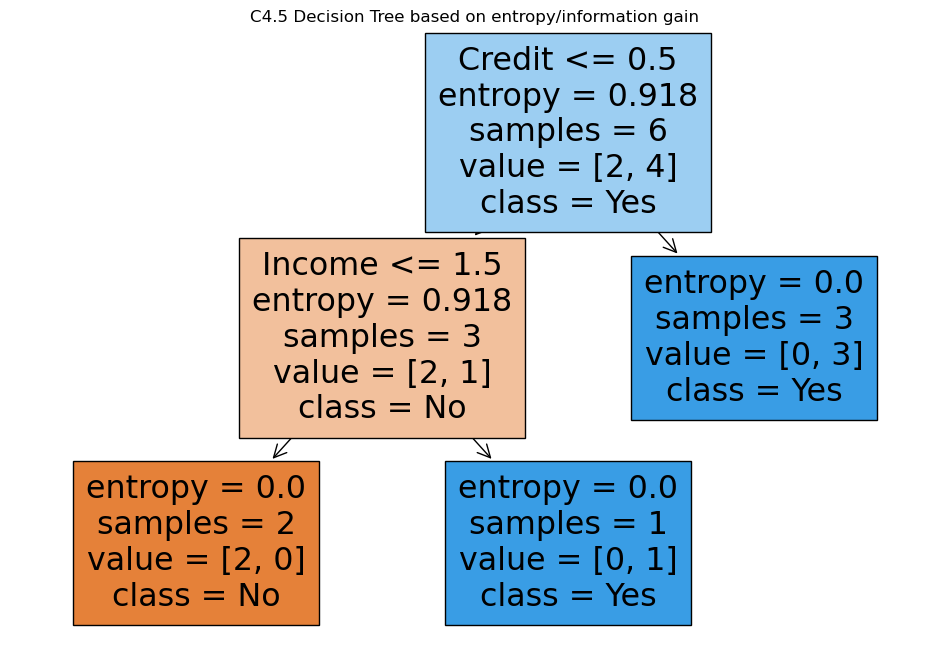

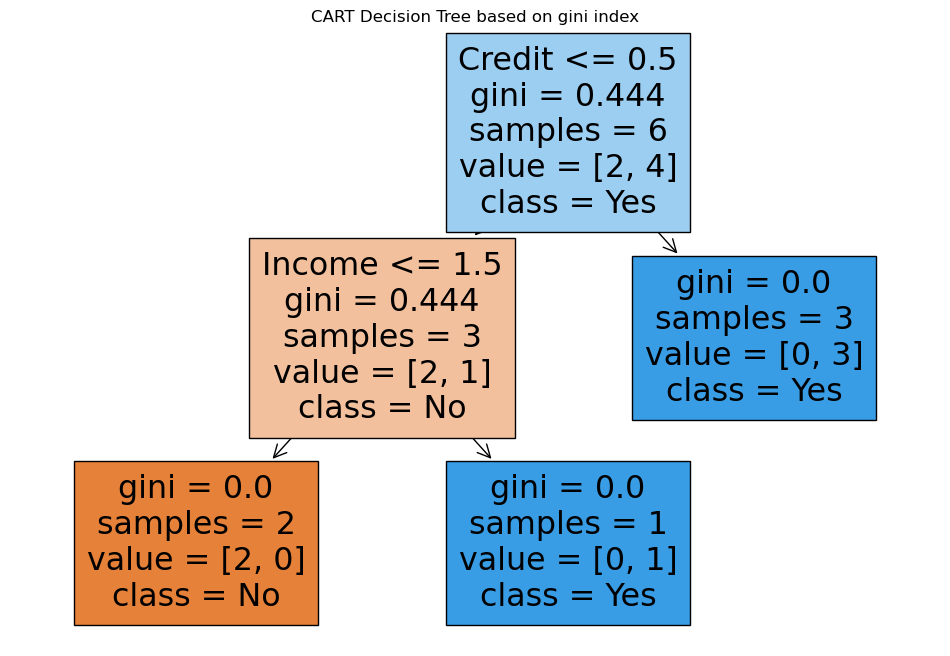

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()

df['Income'] = le.fit_transform(df['Income'])
df['Credit'] = le.fit_transform(df['Credit'])
df['Loan Approved'] = le.fit_transform(df['Loan Approved'])

# Split features (X) and target (y)
X = df[['Income', 'Credit']]  # Feature columns
y = df['Loan Approved']  # Target column

# Train the Decision Tree Classifier using the entropy criterion
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True)
plt.title("C4.5 Decision Tree based on entropy/information gain")
plt.show()

# Train the Decision Tree Classifier using the gini criterion
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True)
plt.title("CART Decision Tree based on gini index")
plt.show()


### Additional Questions

### Q-1

#### without scikit-learn

In [47]:
import math
from collections import Counter

def entropy(data):
    total_count = len(data)
    label_counts = Counter(row[-1] for row in data)
    return -sum((count / total_count) * math.log2(count / total_count) for count in label_counts.values())

def information_gain(data, feature_index):
    total_entropy = entropy(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_entropy = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    return total_entropy - weighted_entropy

def c45(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [information_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = c45(subset, remaining_features)

    return tree

In [27]:
def classify_c45(tree, sample, feature_names):
    if not isinstance(tree, dict):
        return tree  # Return the label if we reach a leaf node
    
    # Get the current feature (by index)
    feature_index = list(tree.keys())[0]
    feature_value = sample[feature_index]

    # Check if the feature value exists in the current tree node
    if feature_value in tree[feature_index]:
        return classify_c45(tree[feature_index][feature_value], sample, feature_names)
    else:
        return None  # Handle unseen feature values
# def predict(tree, instance):
#     if not isinstance(tree, dict):  # If it's a leaf node, return the result
#         return tree
#     feature = next(iter(tree))
#     feature_value = instance[feature]
#     subtree = tree[feature].get(feature_value)
#     return predict(subtree, instance) if subtree else "Unknown"


In [28]:
# Convert DataFrame to list of lists
data_list = df.values.tolist()

# Define feature names and feature indices
feature_names = ['Outlook', 'Temp', 'Humidity', 'Wind']
features = list(range(len(df.columns) - 1))  # Use indices for features (0, 1, 2, 3)

# Build C4.5 decision tree
c45_tree = c45(data_list, features)
print("Generated Decision Tree:")
print(c45_tree)

# Sample to classify (mapped with feature names)
new_sample = {'Outlook': "Overcast", 'Temp': 70, 'Humidity': 65, 'Wind': "Weak"}
# new_sample = [1, 70, 65, 0]  # Example: [Outlook=Overcast, Temp=70, Humidity=65, Wind=Weak]

# Classify the new sample
predicted_class = classify_c45(c45_tree, new_sample, feature_names)
# print(f"\nPredicted class for the sample {new_sample}: {predicted_class}")
print(f"\nPredicted class for the sample {new_sample}: {'Yes' if predicted_class_c45 == 1 else 'No'}")


Generated Decision Tree:
{1: {64: 'Yes', 65: 'No', 68: 'Yes', 69: 'Yes', 70: 'Yes', 71: 'No', 72: {0: {'Overcast': 'Yes', 'Sunny': 'No'}}, 75: 'Yes', 80: 'No', 81: 'Yes', 83: 'Yes', 85: 'No'}}


KeyError: 1

#### with scikit-learn

In [54]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Decision'] = le.fit_transform(df['Decision'])

# Split features (X) and target (y)
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]  # Feature columns
y = df['Decision']  # Target column


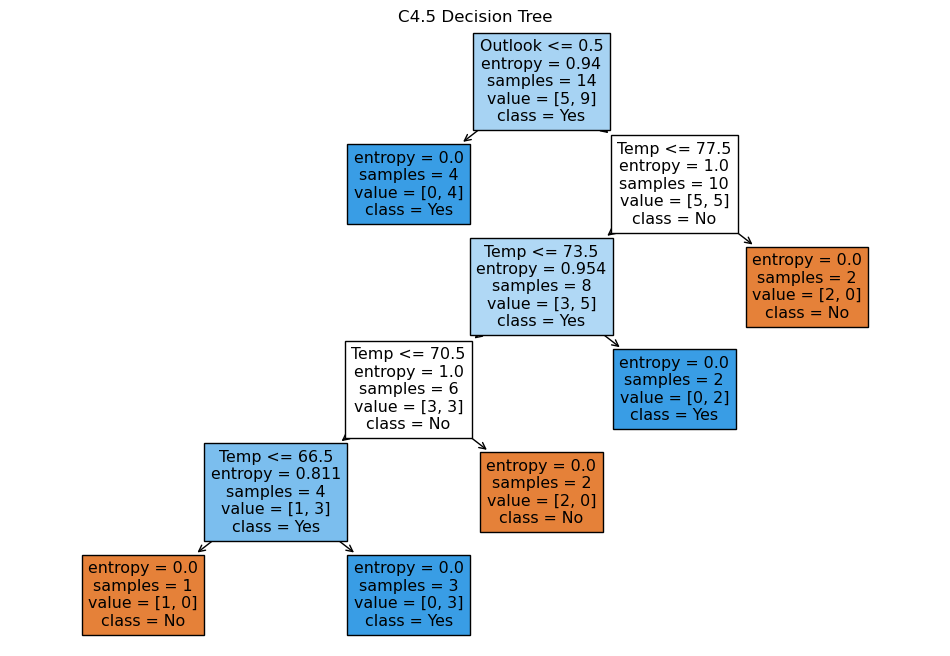

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier using the entropy criterion
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("C4.5 Decision Tree")
plt.show()


In [56]:
# New sample to classify
new_sample = [[1, 70, 65, 0]]  # Example: [Outlook=Overcast, Temp=70, Humidity=65, Wind=Weak]
predicted = tree_clf.predict(new_sample)
print(f"Predicted class for new sample (C4.5 using scikit-learn): {'Yes' if predicted[0] == 1 else 'No'}")


Predicted class for new sample (C4.5 using scikit-learn): Yes


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Q-2

#### without scikit-learn

In [87]:
def gini_impurity(data):
    total_count = len(data)
    if total_count == 0:
        return 0
    label_counts = Counter(row[-1] for row in data)
    return 1 - sum((count / total_count) ** 2 for count in label_counts.values())

def gini_gain(data, feature_index):
    total_gini = gini_impurity(data)
    feature_values = set(row[feature_index] for row in data)
    weighted_gini = 0

    for value in feature_values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_gini += (len(subset) / len(data)) * gini_impurity(subset)

    return total_gini - weighted_gini

def cart(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not features:
        return Counter(labels).most_common(1)[0][0]

    gains = [gini_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for value in set(row[best_feature] for row in data):
        subset = [row for row in data if row[best_feature] == value]
        tree[best_feature][value] = cart(subset, remaining_features)

    return tree

In [77]:
# def classify_cart(tree, sample):
#     if not isinstance(tree, dict):
#         return tree  # Return the label if we reach a leaf node

#     # Get the current feature (by index)
#     feature_index = list(tree.keys())[0]
    
#     # Check if the feature is numerical or categorical
#     if isinstance(sample[feature_index], (int, float)):
#         # Handle numerical feature (check against thresholds)
#         for threshold in tree[feature_index].keys():
#             if sample[feature_index] <= threshold:
#                 return classify_cart(tree[feature_index][threshold]['left'], sample)
#         # If it exceeds all thresholds, go to the right branch
#         return classify_cart(tree[feature_index][threshold]['right'], sample)
    
#     else:
#         # Handle categorical feature
#         feature_value = sample[feature_index]
#         if feature_value in tree[feature_index]:
#             return classify_cart(tree[feature_index][feature_value], sample)
#         else:
#             return None  # Handle unknown values


In [88]:
def classify_cart(tree, sample, feature_names):
    if not isinstance(tree, dict):
        return tree  # Return the label if we reach a leaf node

    # Get the current feature (by index)
    feature_index = list(tree.keys())[0]
    feature_value = sample[feature_index]

    # Check if the feature value exists in the current tree node
    if feature_value in tree[feature_index]:
        return classify_cart(tree[feature_index][feature_value], sample, feature_names)
    else:
        return None  # Handle unseen feature values


In [89]:
# Assuming your data_list and features are already defined
data_list = df.values.tolist()  # Convert DataFrame to list of lists
features = list(range(len(df.columns) - 1))  # Use indices for features (0, 1, 2, 3)

# Build C4.5 decision tree
c45_tree = c45(data_list, features)

# Build CART decision tree (make sure to pass features)
cart_tree = cart(data_list, features)

# Sample to classify (mapped with feature names)
new_sample = [1, 70, 65, 0]  # Example: [Outlook=Overcast, Temp=70, Humidity=65, Wind=Weak]

# Classify using C4.5
predicted_class_c45 = classify_c45(c45_tree, new_sample, feature_names)
print(f"Predicted class for the sample {new_sample} using C4.5: {'Yes' if predicted_class_c45 == 1 else 'No'}")

# Classify using CART
predicted_class_cart = classify_cart(cart_tree, new_sample,feature_names)
print(f"Predicted class for the sample {new_sample} using CART: {'Yes' if predicted_class_cart == 1 else 'No'}")


Predicted class for the sample [1, 70, 65, 0] using C4.5: Yes
Predicted class for the sample [1, 70, 65, 0] using CART: Yes


#### with scikit-learn

In [90]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Decision'] = le.fit_transform(df['Decision'])

# Split features (X) and target (y)
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]  # Feature columns
y = df['Decision']  # Target column


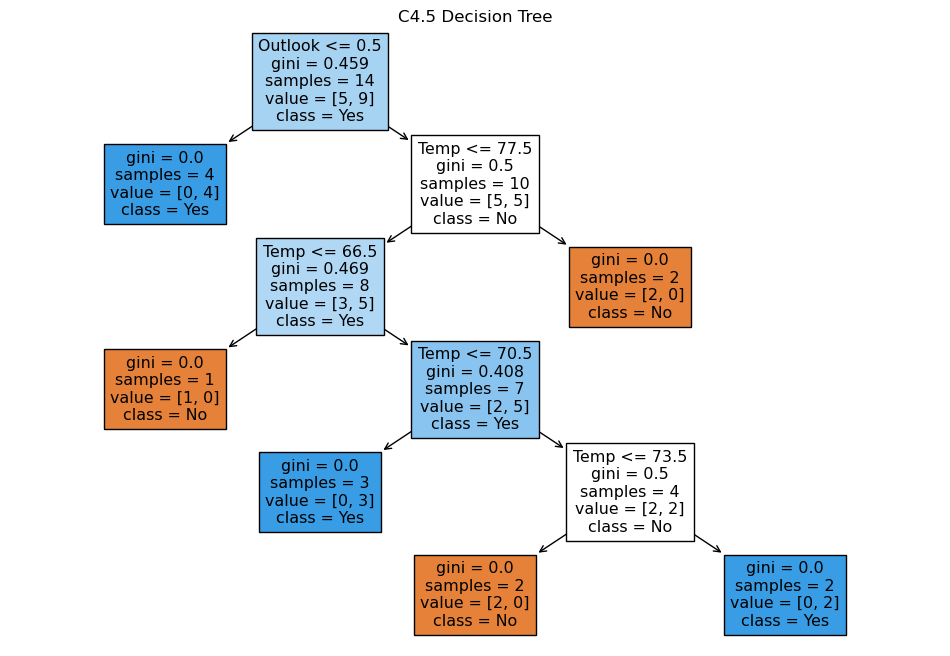

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier using the entropy criterion
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X, y)

# Visualize the decision tree to see the splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("C4.5 Decision Tree")
plt.show()


In [93]:
# New sample to classify
new_sample = [[1, 70, 65, 0]]  # Example: [Outlook=Overcast, Temp=70, Humidity=65, Wind=Weak]
predicted = tree_clf.predict(new_sample)
print(f"Predicted class for new sample (C4.5 using scikit-learn): {'Yes' if predicted[0] == 1 else 'No'}")


Predicted class for new sample (C4.5 using scikit-learn): Yes


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
